In [3]:
import torch, torchvision
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

#Helpers for visualization

def torch_imshow(img):
    img = img[0]
    plt.imshow(img.cpu().numpy())
    plt.show()
    

class GANVisualizer:
    '''
    This class is a utility for visualizing
    generator samples using fixed latent vector to
    track the training of a GAN.
    '''
    def __init__(self):
        self.z = torch.randn(16, 100).cpu()
    
    def visualize(self, generator):
        with torch.no_grad():
            imgs = generator(self.z)
            fig, axes = plt.subplots(4, 4, figsize=(15, 15))
            for n in range(16):
                axis_row = n // 4
                axis_col = n % 4
                
                subplot = axes[axis_row, axis_col] 
                subplot.axis('off')
                img = subplot.imshow(imgs[n].cpu().reshape(28, 28))
                img.set_cmap('gray')
        plt.show()

visualizer = GANVisualizer() 

In [4]:
#Create dataset and dataloader
BATCH_SIZE = 16

mnist = torchvision.datasets.MNIST('./', train=True, download=True, transform=torchvision.transforms.ToTensor())
train_dataloader = DataLoader(dataset=mnist, batch_size=BATCH_SIZE, shuffle=True)

In [5]:
class FCNet(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.layers =  torch.nn.Sequential(
            torch.nn.Linear(input_dim, hidden_dim),
            torch.nn.ReLU(),
            torch.nn.Linear(hidden_dim, output_dim),
            torch.nn.Sigmoid()
        )
    def forward(self, x):
        x = self.layers(x)
        return x
        
generator     = FCNet(100, 256, 784)
discriminator = FCNet(784, 256, 1)

print('--Generator--')
dummy_input_g = torch.randn(16, 100)
dummy_output_g = generator(dummy_input_g)
print(generator)
print(f'Dummy input shape: {dummy_input_g.shape}')
print(f'Dummy output shape: {dummy_output_g.shape}')

print('--Discriminator--')
print(discriminator)
dummy_input_d = torch.randn(16, 784)
dummy_output_d = discriminator(dummy_input_d)
print(f'Dummy input shape: {dummy_input_d.shape}')
print(f'Dummy output shape: {dummy_output_d.shape}')


--Generator--
FCNet(
  (layers): Sequential(
    (0): Linear(in_features=100, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=784, bias=True)
    (3): Sigmoid()
  )
)
Dummy input shape: torch.Size([16, 100])
Dummy output shape: torch.Size([16, 784])
--Discriminator--
FCNet(
  (layers): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=1, bias=True)
    (3): Sigmoid()
  )
)
Dummy input shape: torch.Size([16, 784])
Dummy output shape: torch.Size([16, 1])


In [6]:
# Define an optimizer for both generator and discriminator
g_optimizer = torch.optim.Adam(generator.parameters(), lr=0.0002)
d_optimizer = torch.optim.Adam(discriminator.parameters(), lr=0.0002)



In [7]:
# Define an optimizer for both generator and discriminator
g_optimizer = torch.optim.Adam(generator.parameters(), lr=0.0002)
d_optimizer = torch.optim.Adam(discriminator.parameters(), lr=0.0002)

# Define loss function for GAN suited for the networks you defined
loss_fn = torch.nn.BCELoss()


Epoch: 1
Iteration 100: Generator Loss: 3.603034496307373, Discriminator Loss: 0.127908855676651
Iteration 200: Generator Loss: 2.7786784172058105, Discriminator Loss: 0.5214040875434875
Iteration 300: Generator Loss: 2.15875244140625, Discriminator Loss: 0.488572359085083
Iteration 400: Generator Loss: 2.0938379764556885, Discriminator Loss: 0.32807719707489014
Iteration 500: Generator Loss: 2.3459300994873047, Discriminator Loss: 0.27950164675712585
Iteration 600: Generator Loss: 2.74399471282959, Discriminator Loss: 0.14282986521720886
Iteration 700: Generator Loss: 2.5665552616119385, Discriminator Loss: 0.19524264335632324
Iteration 800: Generator Loss: 2.7794551849365234, Discriminator Loss: 0.11194844543933868
Iteration 900: Generator Loss: 2.5836105346679688, Discriminator Loss: 0.16256892681121826
Iteration 1000: Generator Loss: 2.8877546787261963, Discriminator Loss: 0.10483786463737488
Iteration 1100: Generator Loss: 2.809659957885742, Discriminator Loss: 0.08337006717920303

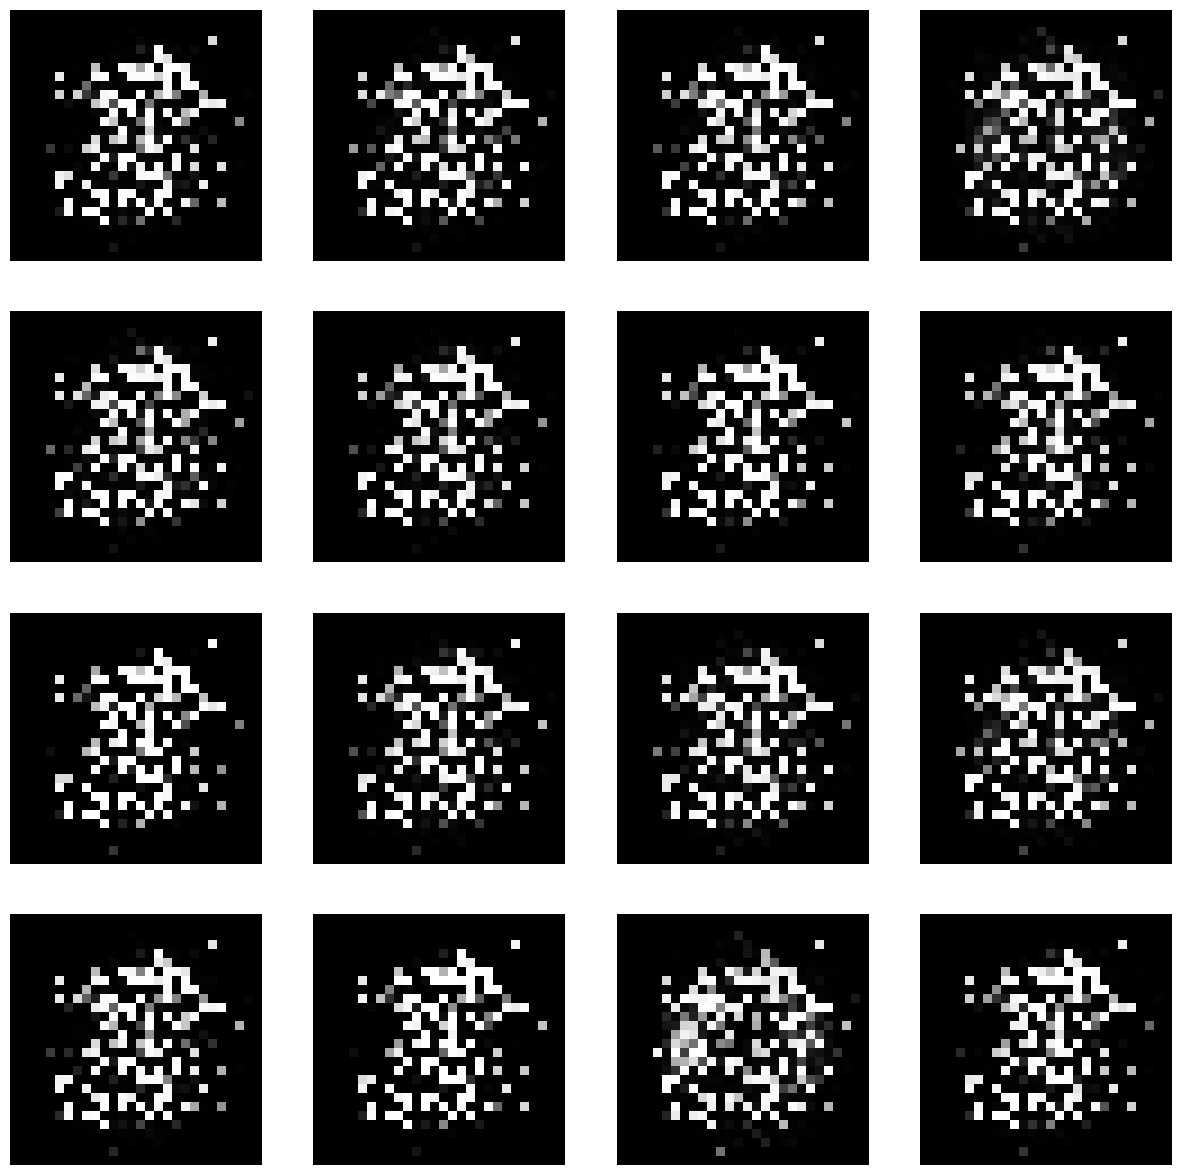

Epoch: 2
Iteration 100: Generator Loss: 3.670269727706909, Discriminator Loss: 0.07404685020446777
Iteration 200: Generator Loss: 4.653008460998535, Discriminator Loss: 0.02904452010989189
Iteration 300: Generator Loss: 4.565094470977783, Discriminator Loss: 0.03186380863189697
Iteration 400: Generator Loss: 4.184684753417969, Discriminator Loss: 0.09306688606739044
Iteration 500: Generator Loss: 4.552608489990234, Discriminator Loss: 0.051027555018663406
Iteration 600: Generator Loss: 4.39288854598999, Discriminator Loss: 0.036272257566452026
Iteration 700: Generator Loss: 4.463488578796387, Discriminator Loss: 0.017857005819678307
Iteration 800: Generator Loss: 4.998766899108887, Discriminator Loss: 0.01880067214369774
Iteration 900: Generator Loss: 4.881652355194092, Discriminator Loss: 0.02775890752673149
Iteration 1000: Generator Loss: 5.235008239746094, Discriminator Loss: 0.020094383507966995
Iteration 1100: Generator Loss: 5.018772602081299, Discriminator Loss: 0.04783509671688

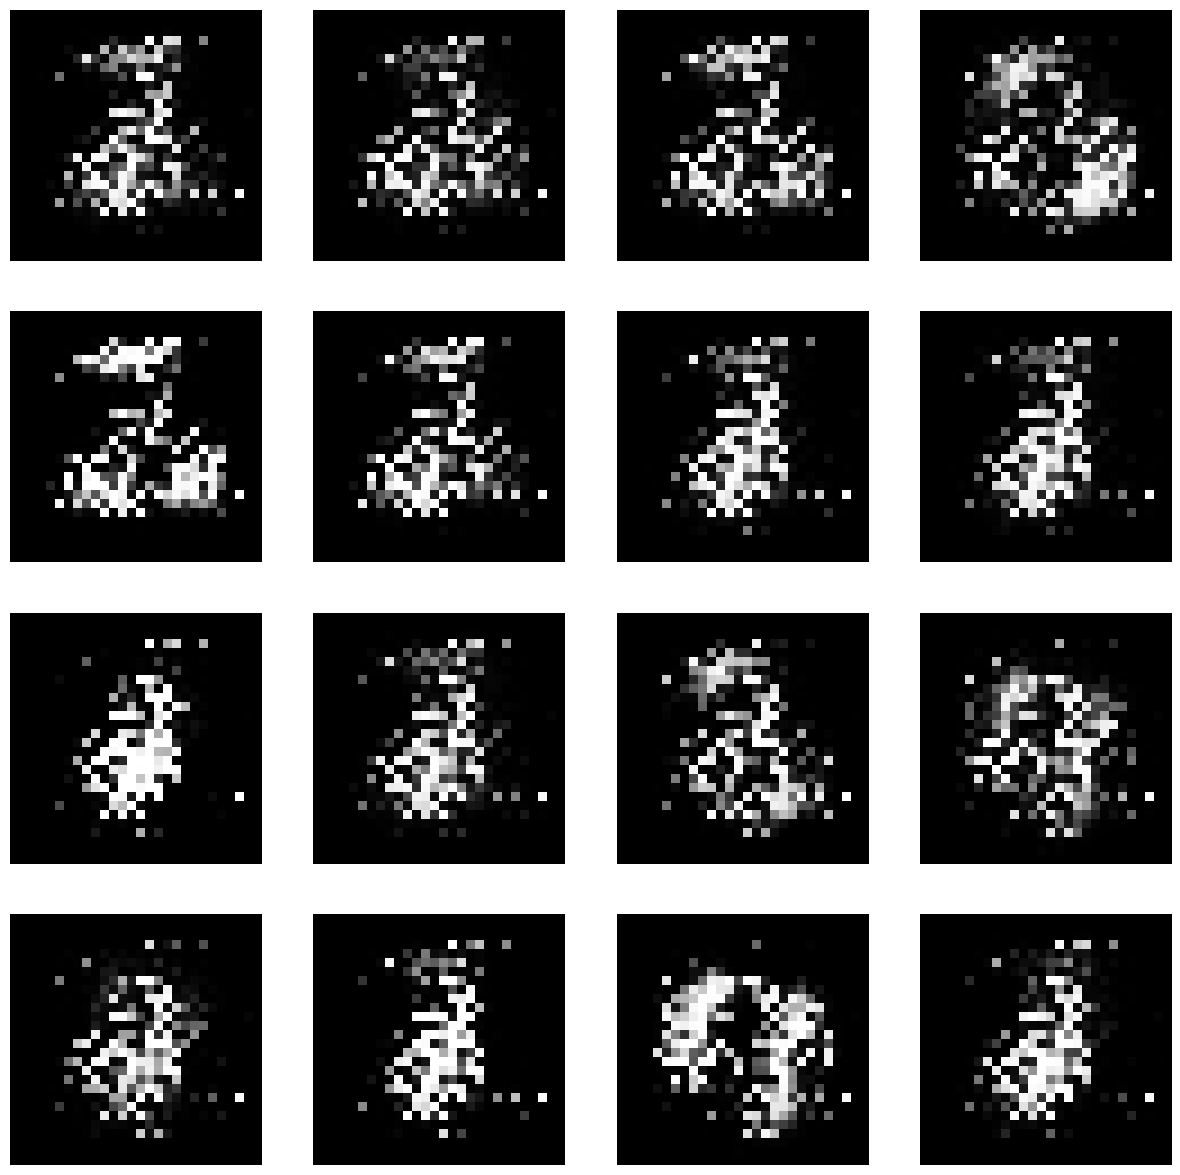

Epoch: 3
Iteration 100: Generator Loss: 3.855743408203125, Discriminator Loss: 0.036821119487285614
Iteration 200: Generator Loss: 3.8287103176116943, Discriminator Loss: 0.148787260055542
Iteration 300: Generator Loss: 3.9970226287841797, Discriminator Loss: 0.321414977312088
Iteration 400: Generator Loss: 3.814868927001953, Discriminator Loss: 0.5246568918228149
Iteration 500: Generator Loss: 3.510449171066284, Discriminator Loss: 0.25691699981689453
Iteration 600: Generator Loss: 3.2172980308532715, Discriminator Loss: 0.24928821623325348
Iteration 700: Generator Loss: 3.273668050765991, Discriminator Loss: 0.3784274160861969
Iteration 800: Generator Loss: 4.432673454284668, Discriminator Loss: 0.23926110565662384
Iteration 900: Generator Loss: 3.0805838108062744, Discriminator Loss: 0.12099589407444
Iteration 1000: Generator Loss: 2.612046718597412, Discriminator Loss: 0.49172794818878174
Iteration 1100: Generator Loss: 2.6049249172210693, Discriminator Loss: 0.253012090921402
Iter

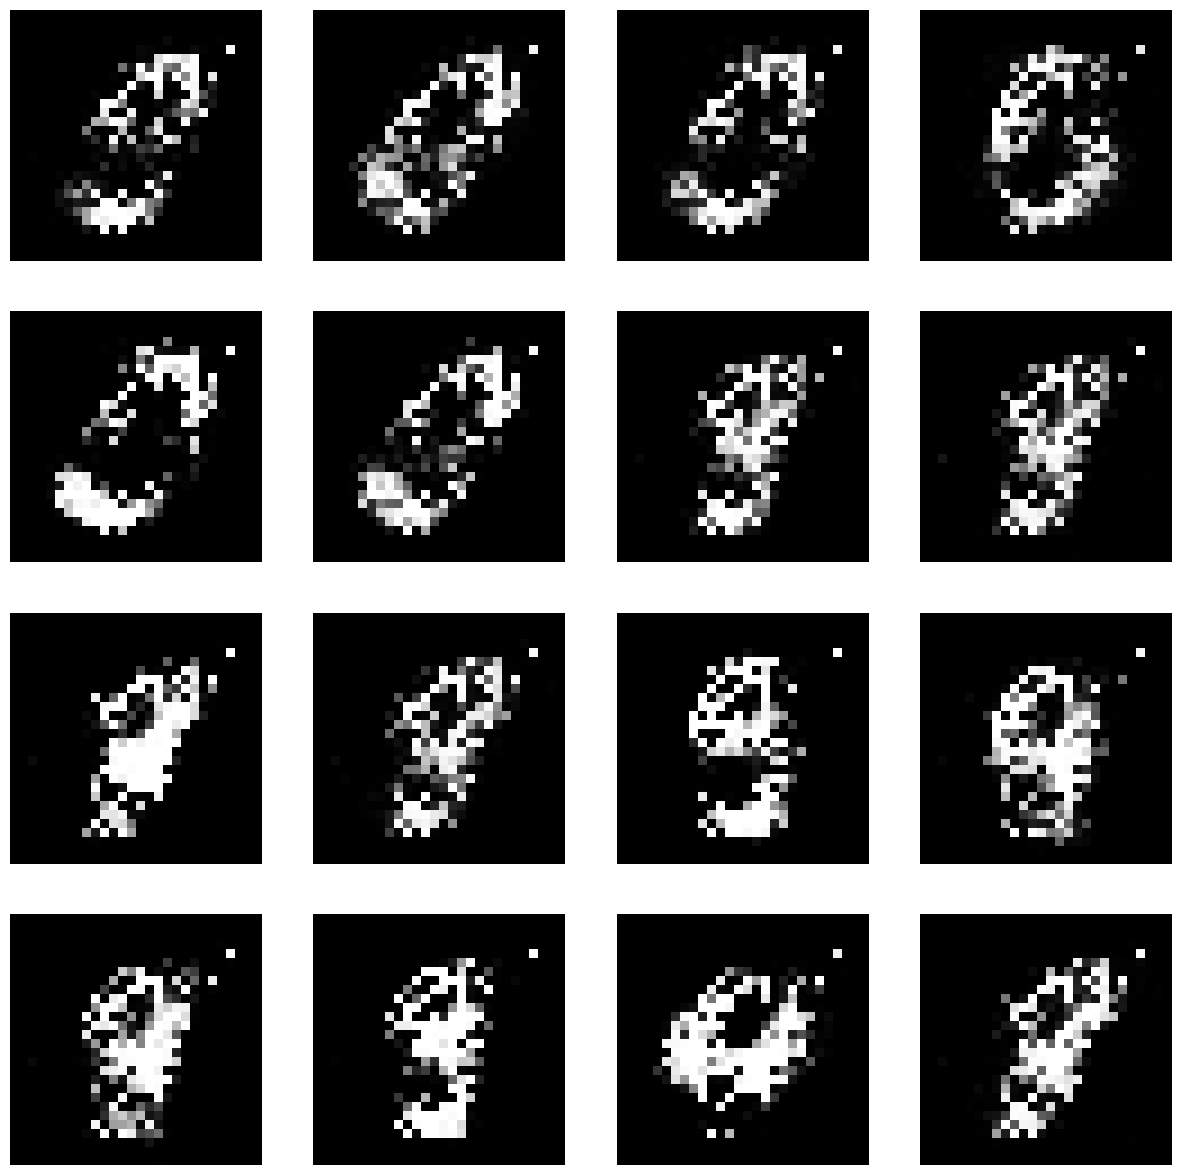

Epoch: 4
Iteration 100: Generator Loss: 3.1247012615203857, Discriminator Loss: 0.08086735755205154
Iteration 200: Generator Loss: 3.0324018001556396, Discriminator Loss: 0.11895652115345001
Iteration 300: Generator Loss: 3.6645426750183105, Discriminator Loss: 0.20756742358207703
Iteration 400: Generator Loss: 3.742063283920288, Discriminator Loss: 0.13334126770496368
Iteration 500: Generator Loss: 2.858908176422119, Discriminator Loss: 0.1655970811843872
Iteration 600: Generator Loss: 3.6772263050079346, Discriminator Loss: 0.23976245522499084
Iteration 700: Generator Loss: 4.0879340171813965, Discriminator Loss: 0.17196190357208252
Iteration 800: Generator Loss: 3.613978862762451, Discriminator Loss: 0.31433409452438354
Iteration 900: Generator Loss: 3.2968521118164062, Discriminator Loss: 0.05183825269341469
Iteration 1000: Generator Loss: 3.4853010177612305, Discriminator Loss: 0.06227118521928787
Iteration 1100: Generator Loss: 3.679344415664673, Discriminator Loss: 0.06643354892

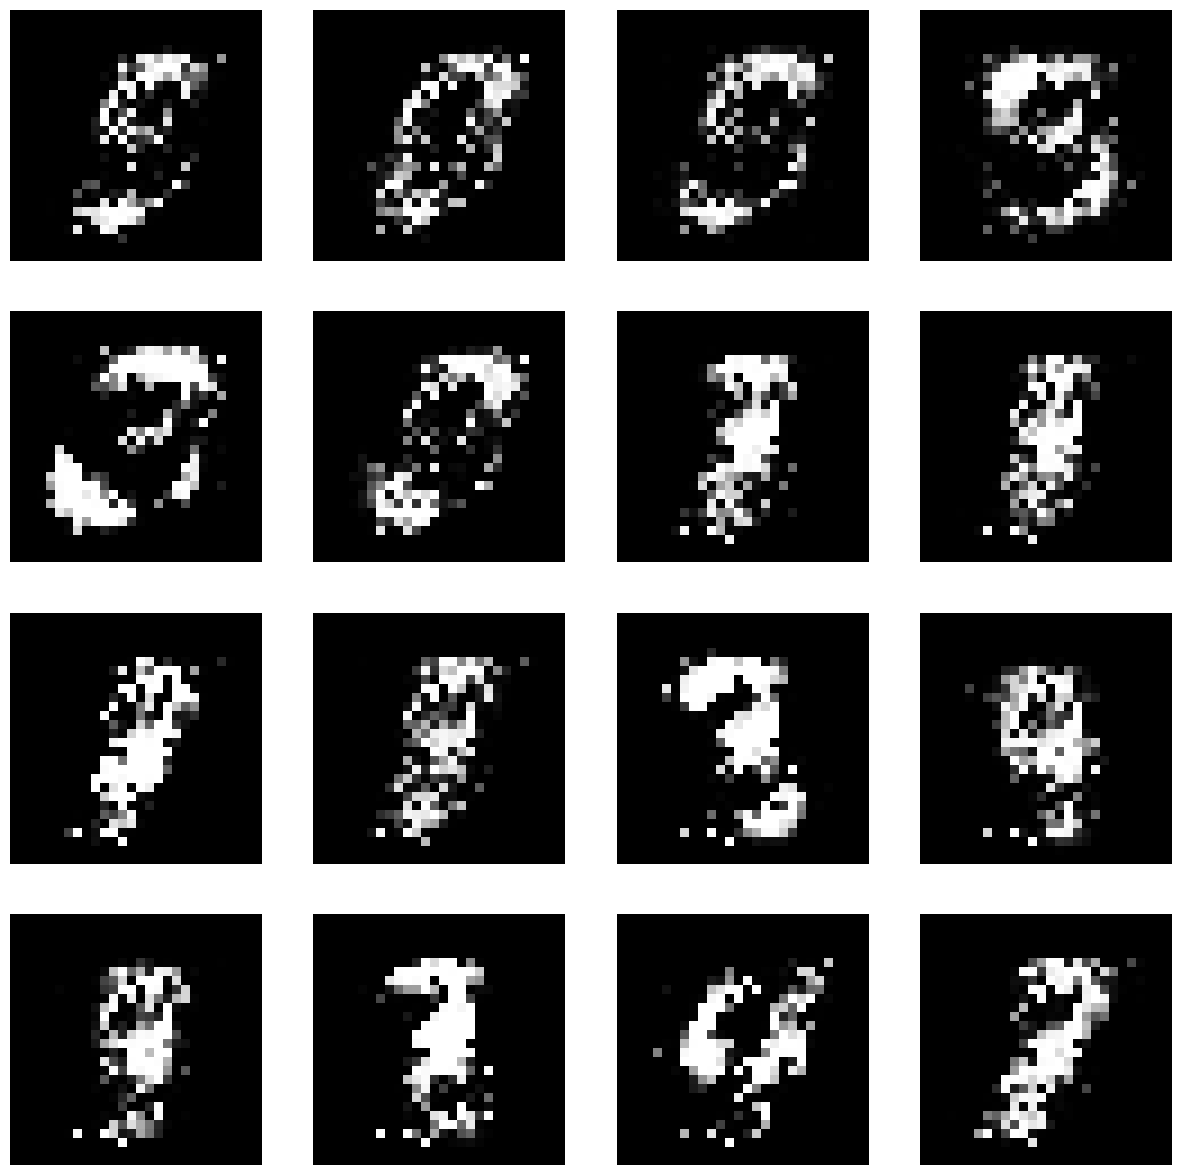

Epoch: 5
Iteration 100: Generator Loss: 3.0068352222442627, Discriminator Loss: 0.2582223415374756
Iteration 200: Generator Loss: 4.414916038513184, Discriminator Loss: 0.17404583096504211
Iteration 300: Generator Loss: 3.219093084335327, Discriminator Loss: 0.13225354254245758
Iteration 400: Generator Loss: 3.746708631515503, Discriminator Loss: 0.13781215250492096
Iteration 500: Generator Loss: 4.923205375671387, Discriminator Loss: 0.06972270458936691
Iteration 600: Generator Loss: 4.171672344207764, Discriminator Loss: 0.09851621091365814
Iteration 700: Generator Loss: 3.2728211879730225, Discriminator Loss: 0.6038898229598999
Iteration 800: Generator Loss: 4.2997941970825195, Discriminator Loss: 0.5023584365844727
Iteration 900: Generator Loss: 4.263335227966309, Discriminator Loss: 0.06365787982940674
Iteration 1000: Generator Loss: 3.159034013748169, Discriminator Loss: 0.21765702962875366
Iteration 1100: Generator Loss: 4.630797386169434, Discriminator Loss: 0.13082152605056763

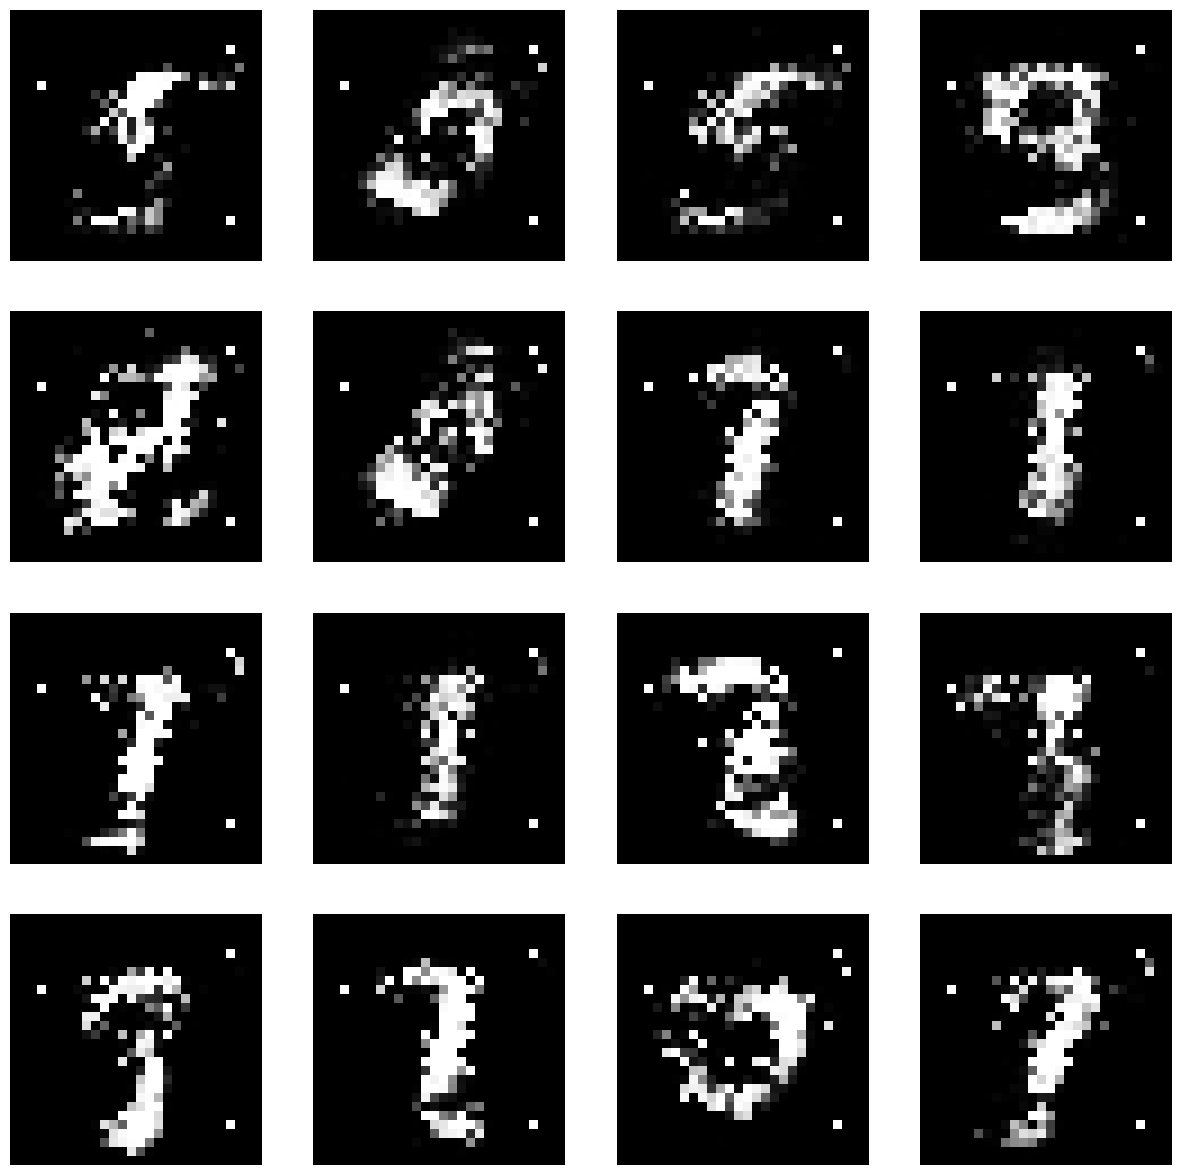

Epoch: 6
Iteration 100: Generator Loss: 3.3901562690734863, Discriminator Loss: 0.1363782435655594
Iteration 200: Generator Loss: 3.9727585315704346, Discriminator Loss: 0.15543405711650848
Iteration 300: Generator Loss: 3.1969687938690186, Discriminator Loss: 0.3242655396461487
Iteration 400: Generator Loss: 2.9440016746520996, Discriminator Loss: 0.19362644851207733
Iteration 500: Generator Loss: 3.6228432655334473, Discriminator Loss: 0.22602364420890808
Iteration 600: Generator Loss: 3.3172671794891357, Discriminator Loss: 0.30498671531677246
Iteration 700: Generator Loss: 1.959553599357605, Discriminator Loss: 0.5032969117164612
Iteration 800: Generator Loss: 3.274470090866089, Discriminator Loss: 0.3335539400577545
Iteration 900: Generator Loss: 3.637831211090088, Discriminator Loss: 0.23412194848060608
Iteration 1000: Generator Loss: 3.458765983581543, Discriminator Loss: 0.24324512481689453
Iteration 1100: Generator Loss: 4.644390106201172, Discriminator Loss: 0.411695748567581

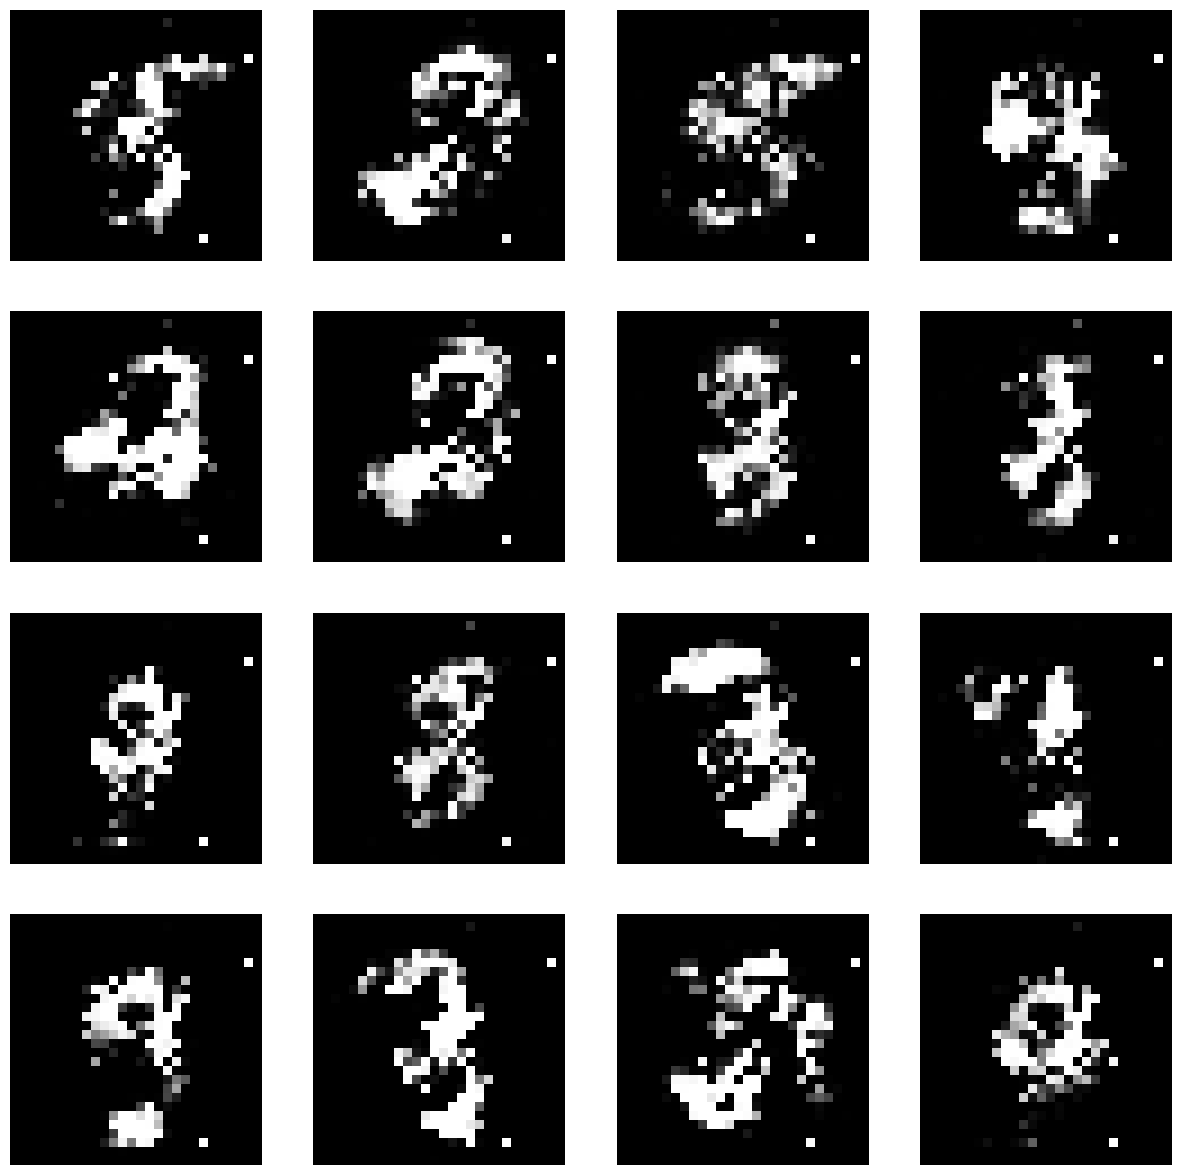

Epoch: 7
Iteration 100: Generator Loss: 3.3998003005981445, Discriminator Loss: 0.10453197360038757
Iteration 200: Generator Loss: 3.65329909324646, Discriminator Loss: 0.06817901879549026
Iteration 300: Generator Loss: 3.5049397945404053, Discriminator Loss: 0.08313664048910141
Iteration 400: Generator Loss: 4.32436466217041, Discriminator Loss: 0.081135094165802
Iteration 500: Generator Loss: 4.467459201812744, Discriminator Loss: 0.37749677896499634
Iteration 600: Generator Loss: 3.6519157886505127, Discriminator Loss: 0.14381559193134308
Iteration 700: Generator Loss: 3.5073273181915283, Discriminator Loss: 0.1172141581773758
Iteration 800: Generator Loss: 3.533581018447876, Discriminator Loss: 0.1843675673007965
Iteration 900: Generator Loss: 4.36530876159668, Discriminator Loss: 0.26711493730545044
Iteration 1000: Generator Loss: 2.64552640914917, Discriminator Loss: 0.254595547914505
Iteration 1100: Generator Loss: 2.494954824447632, Discriminator Loss: 0.2610474228858948
Iterat

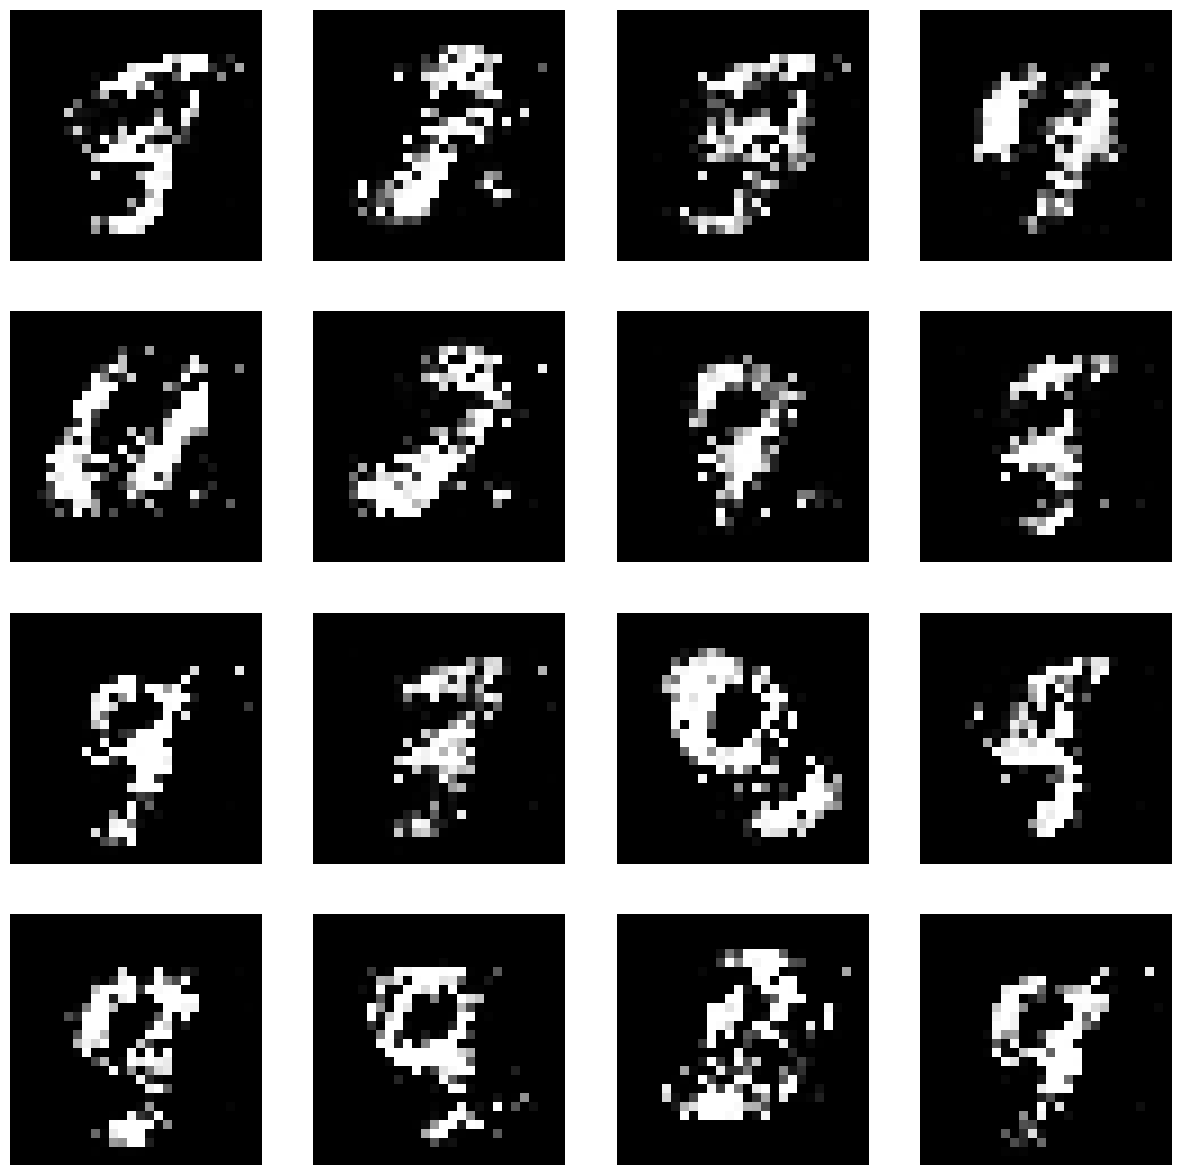

Epoch: 8
Iteration 100: Generator Loss: 4.476835250854492, Discriminator Loss: 0.13161347806453705
Iteration 200: Generator Loss: 3.5819802284240723, Discriminator Loss: 0.23906752467155457
Iteration 300: Generator Loss: 2.8354153633117676, Discriminator Loss: 0.5393442511558533
Iteration 400: Generator Loss: 2.9890177249908447, Discriminator Loss: 0.2664889991283417
Iteration 500: Generator Loss: 4.2288432121276855, Discriminator Loss: 0.4029095470905304
Iteration 600: Generator Loss: 4.806429386138916, Discriminator Loss: 0.16434527933597565
Iteration 700: Generator Loss: 2.673576831817627, Discriminator Loss: 0.37193527817726135
Iteration 800: Generator Loss: 5.232243537902832, Discriminator Loss: 0.05516640469431877
Iteration 900: Generator Loss: 3.3821520805358887, Discriminator Loss: 0.3304845988750458
Iteration 1000: Generator Loss: 4.451854705810547, Discriminator Loss: 0.14265954494476318
Iteration 1100: Generator Loss: 3.1344752311706543, Discriminator Loss: 0.114634454250335

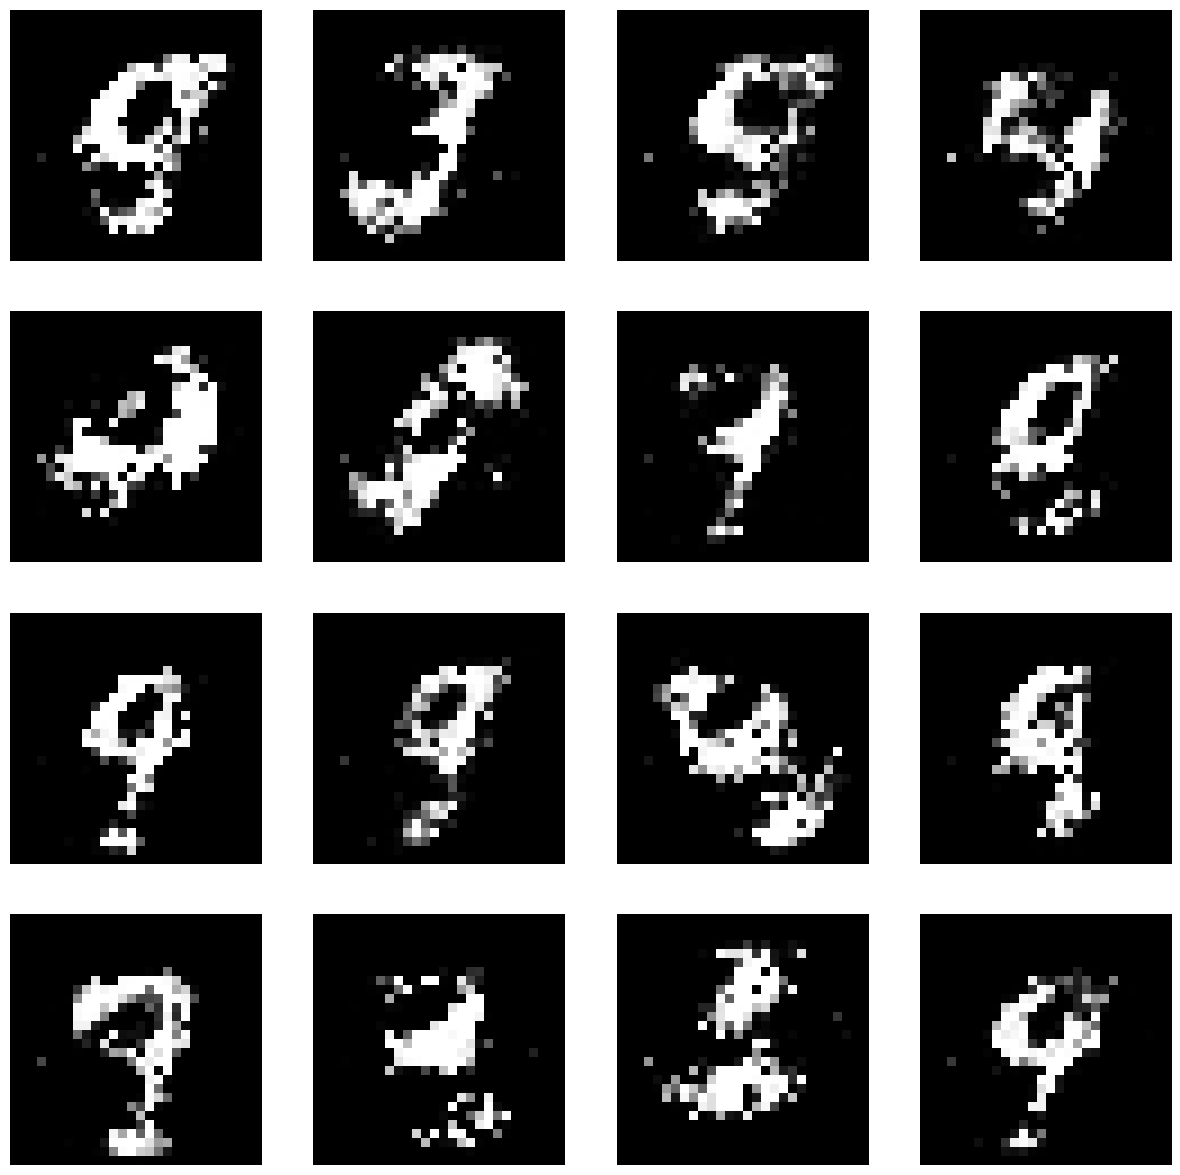

Epoch: 9
Iteration 100: Generator Loss: 3.694992780685425, Discriminator Loss: 0.36559605598449707
Iteration 200: Generator Loss: 4.00444221496582, Discriminator Loss: 0.3206034302711487
Iteration 300: Generator Loss: 2.690575122833252, Discriminator Loss: 0.297139048576355
Iteration 400: Generator Loss: 2.875997304916382, Discriminator Loss: 0.3850187659263611
Iteration 500: Generator Loss: 3.285841464996338, Discriminator Loss: 0.4638175666332245
Iteration 600: Generator Loss: 3.6388967037200928, Discriminator Loss: 0.39444616436958313
Iteration 700: Generator Loss: 2.527019500732422, Discriminator Loss: 0.257046103477478
Iteration 800: Generator Loss: 2.842320680618286, Discriminator Loss: 0.21918122470378876
Iteration 900: Generator Loss: 3.155609130859375, Discriminator Loss: 0.32570067048072815
Iteration 1000: Generator Loss: 4.407160758972168, Discriminator Loss: 0.19831176102161407
Iteration 1100: Generator Loss: 3.3117737770080566, Discriminator Loss: 0.30299311876296997
Itera

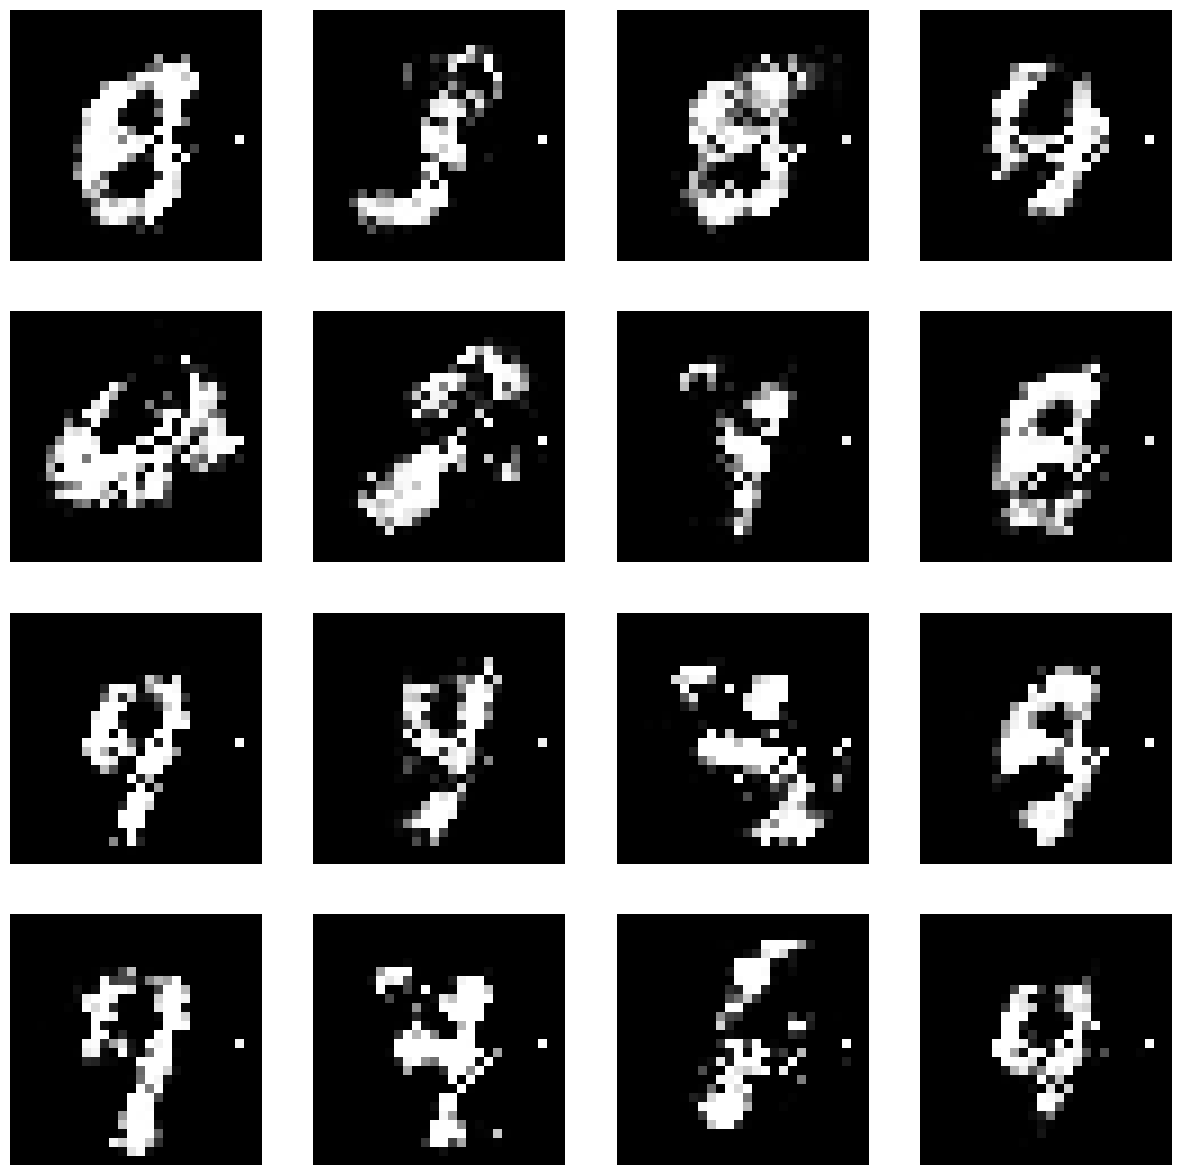

Epoch: 10
Iteration 100: Generator Loss: 3.252192974090576, Discriminator Loss: 0.3346789479255676
Iteration 200: Generator Loss: 3.624664306640625, Discriminator Loss: 0.2427300214767456
Iteration 300: Generator Loss: 2.5387799739837646, Discriminator Loss: 0.672950029373169
Iteration 400: Generator Loss: 3.721714973449707, Discriminator Loss: 0.6706229448318481
Iteration 500: Generator Loss: 2.663332462310791, Discriminator Loss: 0.3340068459510803
Iteration 600: Generator Loss: 3.6949141025543213, Discriminator Loss: 0.18656568229198456
Iteration 700: Generator Loss: 3.1143338680267334, Discriminator Loss: 0.28610676527023315
Iteration 800: Generator Loss: 2.919243335723877, Discriminator Loss: 0.19546574354171753
Iteration 900: Generator Loss: 4.001823425292969, Discriminator Loss: 0.0730358362197876
Iteration 1000: Generator Loss: 4.4016594886779785, Discriminator Loss: 0.06765533983707428
Iteration 1100: Generator Loss: 4.297581672668457, Discriminator Loss: 0.22938503324985504
I

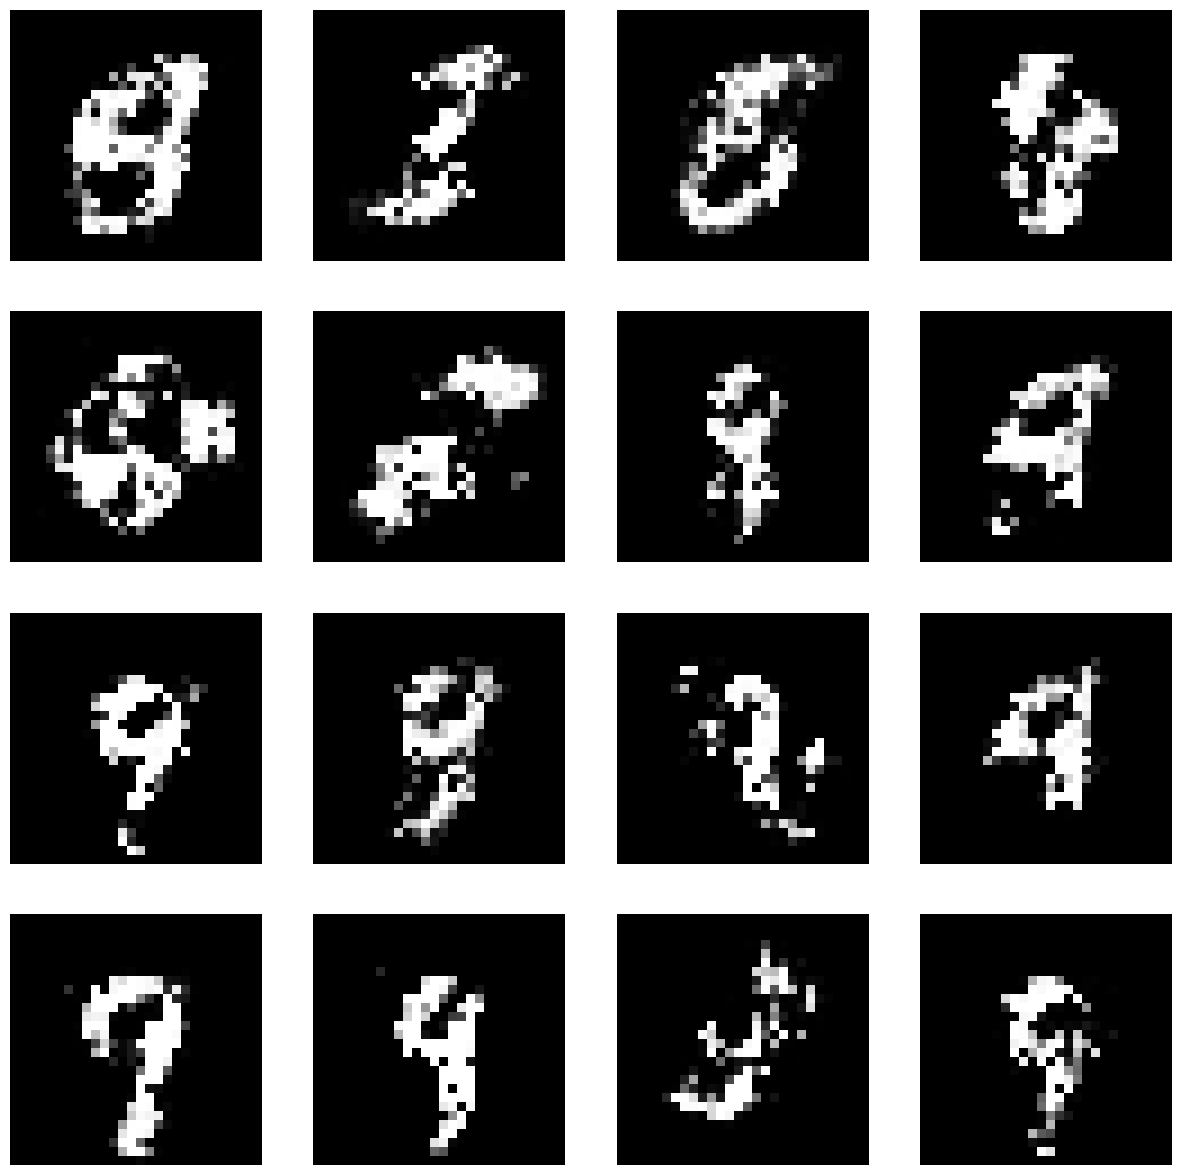

In [9]:
for epoch in range(10):  # Train for at least 10 epochs as specified
    print(f'Epoch: {epoch + 1}')
    
    for iteration, (real_imgs, _) in enumerate(train_dataloader):
        # Flatten the real images
        real_imgs = real_imgs.view(-1, 784)

        # Prepare real and fake labels
        real_labels = torch.ones(BATCH_SIZE, 1)
        fake_labels = torch.zeros(BATCH_SIZE, 1)

        # Generate fake images
        z = torch.randn(BATCH_SIZE, 100)
        fake_imgs = generator(z)

        ## Train generator for one step
        g_optimizer.zero_grad()
        g_loss = loss_fn(discriminator(fake_imgs), real_labels)
        g_loss.backward()
        g_optimizer.step()

        # Train discriminator for one step on real images
        d_optimizer.zero_grad()
        real_loss = loss_fn(discriminator(real_imgs), real_labels)
        real_loss.backward()

        # Train discriminator for one step on fake images
        fake_loss = loss_fn(discriminator(fake_imgs.detach()), fake_labels)
        fake_loss.backward()
        d_optimizer.step()

        d_loss = real_loss + fake_loss

        if (iteration + 1) % 100 == 0:
            print(f'Iteration {iteration + 1}: Generator Loss: {g_loss.item()}, Discriminator Loss: {d_loss.item()}')

    # Visualize generator samples after the epoch
    visualizer.visualize(generator)
